In [1]:
#load libraries
import pandas as pd
import os
import numpy as np
import datetime as dt
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima   

In [2]:
cd

C:\Users\ntarz


In [3]:
cd Jose\Time Series\Data\actual

C:\Users\ntarz\Jose\Time Series\Data\actual


In [4]:
#load folder-the actual data were given in 17 separate excel files
path = os.getcwd()
files = os.listdir(path)
files

['.ipynb_checkpoints',
 'Cons_Report_012018.xlsx',
 'Cons_Report_012019.xlsx',
 'Cons_Report_022018.xlsx',
 'Cons_Report_022019.xlsx',
 'Cons_Report_032018.xlsx',
 'Cons_Report_032019.xlsx',
 'Cons_Report_042018.xlsx',
 'Cons_Report_042019.xlsx',
 'Cons_Report_052018.xlsx',
 'Cons_Report_052019.xlsx',
 'Cons_Report_062018.xlsx',
 'Cons_Report_072018.xlsx',
 'Cons_Report_082018.xlsx',
 'Cons_Report_092018.xlsx',
 'Cons_Report_102018.xlsx',
 'Cons_Report_112018.xlsx',
 'Cons_Report_122018.xlsx',
 'LoadForecastingTest.ipynb',
 'Load_Forecasting.ipynb']

In [5]:
#list of files to loop-only xlsx
files_xls = [f for f in files if 'xlsx' in str(f)]
files_xls

['Cons_Report_012018.xlsx',
 'Cons_Report_012019.xlsx',
 'Cons_Report_022018.xlsx',
 'Cons_Report_022019.xlsx',
 'Cons_Report_032018.xlsx',
 'Cons_Report_032019.xlsx',
 'Cons_Report_042018.xlsx',
 'Cons_Report_042019.xlsx',
 'Cons_Report_052018.xlsx',
 'Cons_Report_052019.xlsx',
 'Cons_Report_062018.xlsx',
 'Cons_Report_072018.xlsx',
 'Cons_Report_082018.xlsx',
 'Cons_Report_092018.xlsx',
 'Cons_Report_102018.xlsx',
 'Cons_Report_112018.xlsx',
 'Cons_Report_122018.xlsx']

In [6]:
#create one datafram from all the excel files
actual=pd.DataFrame()
for f in files_xls:
    data = pd.read_excel(f)
    actual=actual.append(data,ignore_index=True)

In [7]:
#get column names
actual.columns


Index(['deliveryDay', 'Hour_EET', 'Gen_Aux', 'HV', 'Pump', 'TEL_MV', 'Network',
       'Total'],
      dtype='object')

In [8]:
#rename columns
actual.columns=['Date','Hour','Gen_Aux', 'HV', 'Pump', 'TEL_MV', 'Network','ActualTotal']

In [9]:
cd

C:\Users\ntarz


In [10]:
cd Jose\Time Series\Data

C:\Users\ntarz\Jose\Time Series\Data


In [11]:
#load excel with forecast of the current program
forecast=pd.read_excel("Load Demand_Forecast.xlsx")

In [12]:
#data manipulation to create new dataframe
forecast2=forecast[['Weekday',  'Holiday','Date', 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
Prediction = pd.melt(forecast2, id_vars=["Weekday", "Holiday", "Date"])
#rename columns
Prediction.columns=['Weekday','Holiday','Date','Hour','ForecastTotalLoad']


In [13]:
#join the two dataframes and create the finalized dataframe
final=pd.concat([df.set_index(['Date', 'Hour']) for df in [actual, Prediction]],
          axis=1).reset_index()

In [14]:
#create temp dataframe to store in columns the parsed date
temp=pd.DataFrame(final.Date.dt.strftime('%Y-%m-%d').str.split('-').tolist(),
                   columns=['Year','Month','Day'],dtype=int)

In [15]:
#merge it with our data
final=pd.concat((final,temp),axis=1)

In [16]:
#do data manipulation in order for following function to work
final['Hour']=final['Hour'].astype(int)
final['Month']=final['Month'].astype(int)
final['Year']=final['Year'].astype(int)
final['Day']=final['Day'].astype(int)
final['Hour']=final['Hour']-1


In [17]:
#create datetime object to store the timestamp
final['Timestamp'] = final.apply(lambda row: dt.datetime(row.Year,row.Month,row.Day,row.Hour), 
                           axis=1)

In [18]:
#εχω ενα ΝΑ το οποίο οφείλεται στην αλλαγή της ωρας 25/3, εχω μιλήσει με τον αναλυτη εδω για το πως πρεπει να το διαχειριστω
#προς το παρον βαζω την τιμη της προηγούμενης ώρας manually
final=final.fillna(4.432)

In [19]:
#check for null values-Clean
final.isnull().values.any()

False

In [20]:
#create the column of interest
final['XT']=final['Network']-final['TEL_MV']
#finalize dataset and set frequency
final=final[['Timestamp','XT','Weekday','Holiday']]
final.set_index('Timestamp',inplace=True)
final.index.freq = 'H'

In [21]:
#check the finalized dataset
final

,XT,Weekday,Holiday
Timestamp,,,
2018-01-01 00:00:00,3933.209685,1,1
2018-01-01 01:00:00,3615.862294,1,1
2018-01-01 02:00:00,3531.408073,1,1
2018-01-01 03:00:00,3250.926682,1,1
2018-01-01 04:00:00,3027.204711,1,1
2018-01-01 05:00:00,2934.418572,1,1
2018-01-01 06:00:00,2990.903843,1,1
2018-01-01 07:00:00,3048.662534,1,1
2018-01-01 08:00:00,3189.215049,1,1


In [ ]:
#Here is going to be the EDA part-just some quick insights

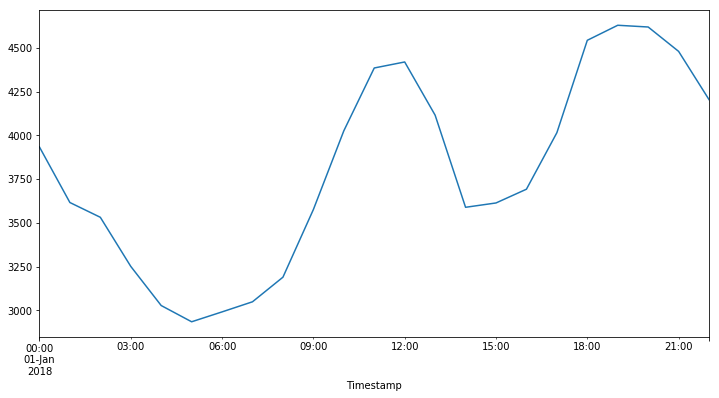

In [22]:
final['XT'].iloc[:23].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

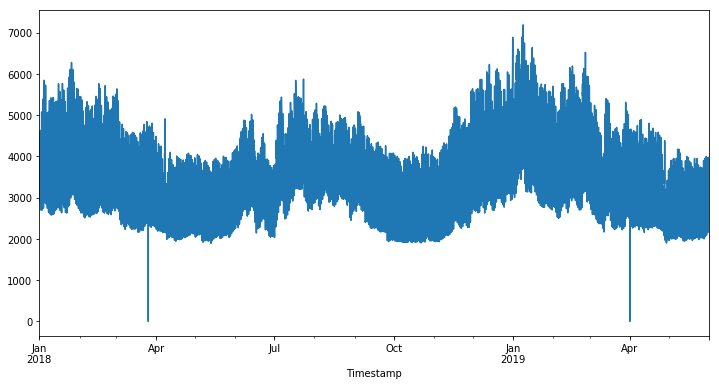

In [23]:
#αυτα τα 2 outliers ειναι οταν αλλαζει η ωρα τον Μαρτιο
final['XT'].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

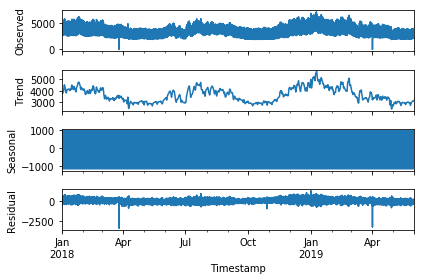

In [24]:
result = seasonal_decompose(final['XT'])
result.plot();

In [25]:
#create ad-fuller test function
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [26]:
adf_test(final['XT'])

Augmented Dickey-Fuller Test: 
ADF test statistic         -3.886426
p-value                     0.002137
# lags used                40.000000
# observations          12343.000000
critical value (1%)        -3.430880
critical value (5%)        -2.861774
critical value (10%)       -2.566895
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [28]:
# For SARIMA Orders we set seasonal=True and pass in an m value
#auto_arima(final['XT'].loc['2019-01-01':'2019-05-01'],seasonal=True,m=24).summary()

C:\Users\ntarz\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\ntarz\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\ntarz\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:726: RuntimeWarning: divide by zero encountered in double_scalars
  (1 - np.sum(tra

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2904
Model:             SARIMAX(1, 1, 1)x(2, 0, 0, 24)   Log Likelihood              -18677.594
Date:                            Fri, 12 Jul 2019   AIC                          37367.188
Time:                                    15:42:09   BIC                          37403.029
Sample:                                         0   HQIC                         37380.102
                                           - 2904                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -7.075e-05      0.004     -0.020      0.984      -0.007       0.007
ar.L1          0.9975      0.060     16.507      0.000       0.879       1.116
ma.L1         -0.9992      0.063    -15.929      0.000      -1.122      -0.876
ar.S.L24       0.5501      0.002    231.330      0.000       0.545       0.555
ar.S.L48       0.3748      0.003    116.922      0.000       0.369       0.381
sigma2       2.24e+04     92.745    241.474      0.000    2.22e+04    2.26e+04
===================================================================================
Ljung-Box (Q):                      363.54   Jarque-Bera (JB):           6826865.50
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.22   Skew:                             0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                       240.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
#use the period used for training
df1=final.loc['2019-03-01':'2019-05-01']

In [30]:
#train/test split
train = df1.iloc[:1440]
test = df1.iloc[1440:]

In [39]:
#run model
#model = SARIMAX(train['XT'],exog=train[['Holiday']],order=(1,1,1),seasonal_order=(2,0,0,24),enforce_invertibility=False)
results = model.fit()
results.summary()

C:\Users\ntarz\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                 XT   No. Observations:                 1440
Model:             SARIMAX(1, 1, 1)x(2, 0, 0, 24)   Log Likelihood               -9491.364
Date:                            Fri, 12 Jul 2019   AIC                          18994.728
Time:                                    15:49:19   BIC                          19026.358
Sample:                                03-01-2019   HQIC                         19006.536
                                     - 04-29-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Holiday      -50.7683     69.743     -0.728      0.467    -187.462      85.925
ar.L1          0.8369      0.005    156.424      0.000       0.826       0.847
ma.L1         -0.9975      0.005   -216.951      0.000      -1.007      -0.989
ar.S.L24       0.5002      0.004    119.822      0.000       0.492       0.508
ar.S.L48       0.3834      0.005     72.559      0.000       0.373       0.394
sigma2      3.112e+04    144.697    215.074      0.000    3.08e+04    3.14e+04
===================================================================================
Ljung-Box (Q):                      136.02   Jarque-Bera (JB):           1960615.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -1.73
Prob(H) (two-sided):                  0.00   Kurtosis:                       183.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['Holiday']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(1,1,1)(2,0,0,24) Predictions')

C:\Users\ntarz\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


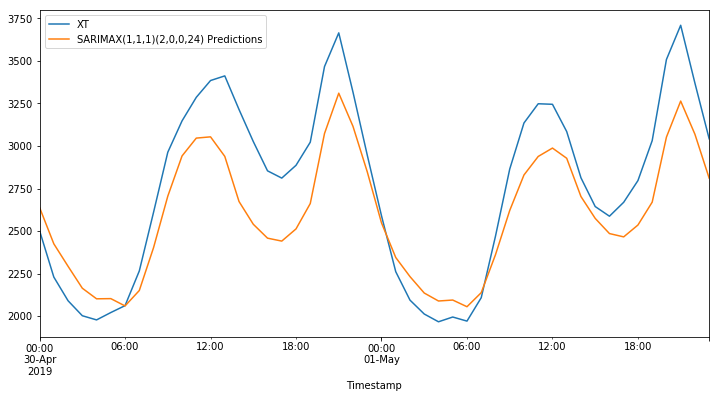

In [41]:
# Plot predictions against known values
ax = test['XT'].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)